In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
ls

GA1.ipynb         table-2-1.xlsx    ~$table-2-1.xlsx
table-1-1.xlsx    ~$table-1-1.xlsx


In [7]:
census_data = pd.read_excel('table-2-1.xlsx', header=5, skipfooter=10, index_col=0)

In [8]:
census_data

,Unnamed: 1,None - 8th grade,9th - 11th grade2,High school graduate,"Some college, no degree",Associate's degree3,Bachelor's degree,Master's degree,Professional degree,Doctoral degree
Total,223058.0,7895.0,12313.0,61597.0,33986.0,23566.0,52164.0,23516.0,3362,4659
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
".Married, spouse present",127930.0,4226.0,5690.0,31970.0,18068.0,13714.0,32361.0,16169.0,2354,3380
".Married, spouse absent, not separated",3286.0,245.0,199.0,923.0,426.0,317.0,693.0,337.0,50,96
...,...,...,...,...,...,...,...,...,...,...
.Professional and business services,17600.0,406.0,563.0,2690.0,1996.0,1497.0,6444.0,2619.0,773,612
.Educational and health services,32334.0,182.0,540.0,4601.0,3523.0,4275.0,9241.0,7037.0,1070,1867
.Leisure and hospitality,9191.0,432.0,666.0,3126.0,1610.0,912.0,1927.0,423.0,51,45
.Other services,6476.0,184.0,336.0,2074.0,971.0,820.0,1301.0,613.0,73,104


In [40]:
# subsetting into marital data
marital_df = census_data[3:9]
del marital_df['Unnamed: 1']
marital_df.head()

,None - 8th grade,9th - 11th grade2,High school graduate,"Some college, no degree",Associate's degree3,Bachelor's degree,Master's degree,Professional degree,Doctoral degree
".Married, spouse present",4226.0,5690.0,31970.0,18068.0,13714.0,32361.0,16169.0,2354,3380
".Married, spouse absent, not separated",245.0,199.0,923.0,426.0,317.0,693.0,337.0,50,96
.Separated,306.0,501.0,1473.0,728.0,384.0,575.0,237.0,46,24
.Widowed,1044.0,1361.0,5335.0,2452.0,1299.0,2072.0,885.0,121,144
.Divorced,626.0,1571.0,7719.0,4629.0,3319.0,4707.0,2025.0,298,311


In [43]:
to_use = ['.Married, spouse present', '.Divorced']
percentages = pd.DataFrame()

# looking at married w/ spous present and divorced
for row in to_use:
    data = []
    # iterate through each column
    for col in marital_df.columns:
        # sum the rows to get denominator for percentage
        total = marital_df.loc[row].sum()
        data.append((marital_df.at[row, col]/total) * 100)
    # create dataframe to concat w/ marital df
    data_df = pd.DataFrame([data], columns=marital_df.columns)
    percentages = pd.concat([percentages,data_df], axis=0, ignore_index=False)
    percentages.rename(index={0: row + " percentages"}, inplace=True)
    
percentages
        

,None - 8th grade,9th - 11th grade2,High school graduate,"Some college, no degree",Associate's degree3,Bachelor's degree,Master's degree,Professional degree,Doctoral degree
".Married, spouse present percentages",3.303317,4.447675,24.989838,14.123128,10.719757,25.295469,12.638746,1.840040,2.642029
.Divorced percentages,2.483634,6.232890,30.624876,18.365404,13.168022,18.674866,8.034120,1.182305,1.233882


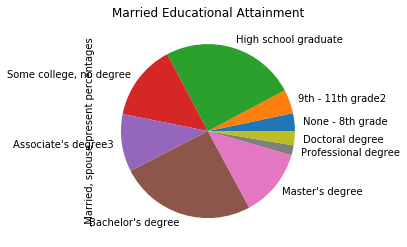

In [58]:
percentages.iloc[0].plot(kind='pie', title='Married Educational Attainment')

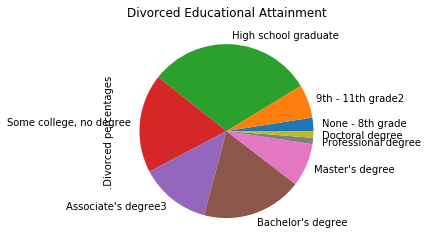

In [59]:
percentages.iloc[1].plot(kind='pie', title='Divorced Educational Attainment')

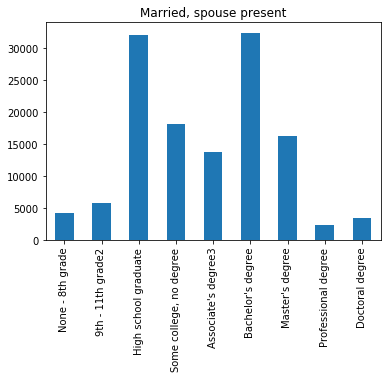

In [48]:
# looking at married, spouse present
marital_df.iloc[0].plot(kind="bar", title='Married, spouse present')

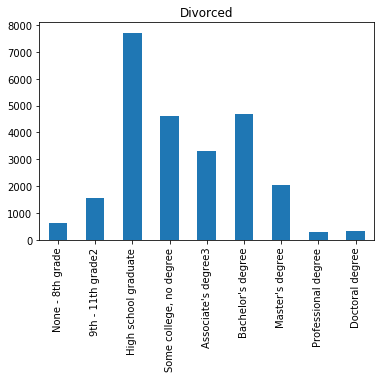

In [47]:
# looking at divorced
marital_df.iloc[4].plot(kind="bar", title='Divorced')

In [35]:
# subsetting into employment data
employment_df = census_data[38:40]
del employment_df['Unnamed: 1']
employment_df.head()

,None - 8th grade,9th - 11th grade2,High school graduate,"Some college, no degree",Associate's degree3,Bachelor's degree,Master's degree,Professional degree,Doctoral degree
Employed,3142.0,5194.0,32930.0,19733.0,15403.0,36695.0,16562.0,2495,3447
Unemployed,279.0,491.0,2048.0,1077.0,652.0,1175.0,449.0,59,69


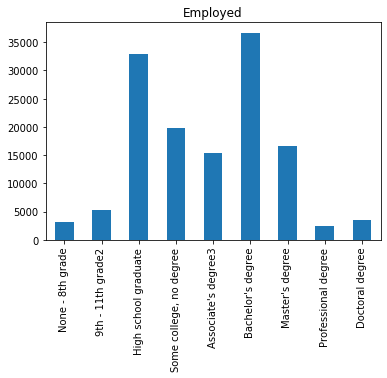

In [49]:
employment_df.iloc[0].plot(kind="bar", title='Employed')

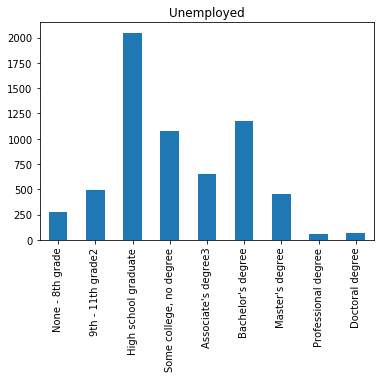

In [50]:
employment_df.iloc[1].plot(kind="bar", title='Unemployed')

In [46]:
emp_to_use = ['Employed', 'Unemployed']
emp_percentages = pd.DataFrame()

# looking at married w/ spous present and divorced
for row in emp_to_use:
    data = []
    # iterate through each column
    for col in employment_df.columns:
        # sum the rows to get denominator for percentage
        total = employment_df.loc[row].sum()
        data.append((employment_df.at[row, col]/total) * 100)
    # create dataframe to concat w/ marital df
    data_df = pd.DataFrame([data], columns=employment_df.columns)
    emp_percentages = pd.concat([emp_percentages,data_df], axis=0, ignore_index=False)
    emp_percentages.rename(index={0: row + " percentages"}, inplace=True)
    
emp_percentages

,None - 8th grade,9th - 11th grade2,High school graduate,"Some college, no degree",Associate's degree3,Bachelor's degree,Master's degree,Professional degree,Doctoral degree
Employed percentages,2.317092,3.830355,24.284482,14.552253,11.359061,27.061010,12.213774,1.839957,2.542017
Unemployed percentages,4.429274,7.794888,32.513097,17.097952,10.350849,18.653755,7.128116,0.936657,1.095412


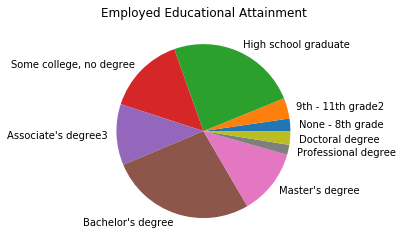

In [62]:
emp_percentages.iloc[0].plot(kind='pie', title='Employed Educational Attainment', label='')

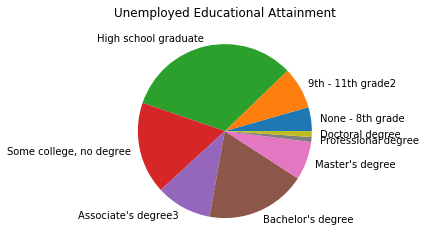

In [63]:
emp_percentages.iloc[1].plot(kind='pie', title='Unemployed Educational Attainment', label='')